In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/home/atharv/ML_Model_FPGA_Eklavya23/csv_dataset/train.csv')
data.head(5)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T #dividing the dataset into test and train
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. #to get more standardised pixel values

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([6, 8, 3, ..., 0, 0, 9])

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X): #defining equations for weighted sum and activated function
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y): # one hot encoding the output to get 10*1 dimensions
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
#backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): #finding cost function for the parameters
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): #changing the weights as per the learning rates
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.12, 600)

Iteration:  0
[1 1 1 ... 1 1 0] [6 8 3 ... 0 0 9]
0.06851219512195122
Iteration:  10
[3 0 6 ... 5 5 7] [6 8 3 ... 0 0 9]
0.2162439024390244
Iteration:  20
[3 0 3 ... 0 0 7] [6 8 3 ... 0 0 9]
0.28636585365853656
Iteration:  30
[3 0 3 ... 0 0 7] [6 8 3 ... 0 0 9]
0.3403658536585366
Iteration:  40
[2 0 3 ... 0 0 7] [6 8 3 ... 0 0 9]
0.3816829268292683
Iteration:  50
[4 0 3 ... 0 0 4] [6 8 3 ... 0 0 9]
0.42041463414634145
Iteration:  60
[4 5 3 ... 0 0 4] [6 8 3 ... 0 0 9]
0.4658048780487805
Iteration:  70
[4 5 3 ... 0 0 4] [6 8 3 ... 0 0 9]
0.5102926829268293
Iteration:  80
[4 5 3 ... 0 0 4] [6 8 3 ... 0 0 9]
0.5485365853658537
Iteration:  90
[4 5 3 ... 0 0 4] [6 8 3 ... 0 0 9]
0.5796341463414634
Iteration:  100
[4 5 3 ... 0 0 4] [6 8 3 ... 0 0 9]
0.6050975609756097
Iteration:  110
[4 5 3 ... 0 0 4] [6 8 3 ... 0 0 9]
0.6279024390243902
Iteration:  120
[4 5 3 ... 0 0 4] [6 8 3 ... 0 0 9]
0.6481707317073171
Iteration:  130
[4 5 3 ... 0 0 4] [6 8 3 ... 0 0 9]
0.6667560975609756
Iteration:  14

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


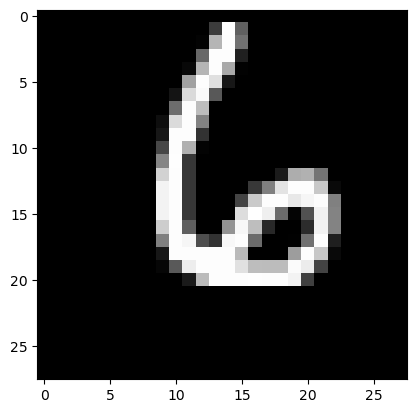

Prediction:  [5]
Label:  8


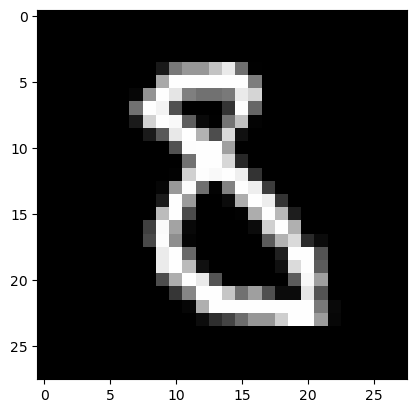

Prediction:  [3]
Label:  3


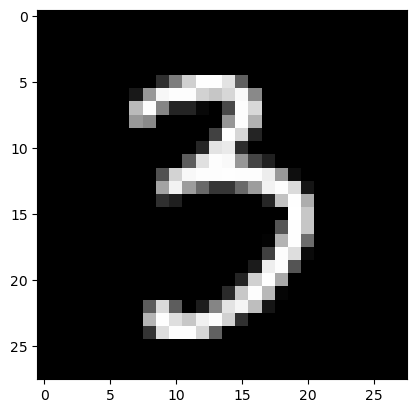

Prediction:  [5]
Label:  5


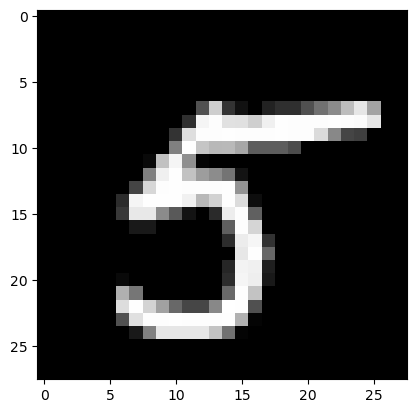

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 3 3 1 1 0 0 2 4 3 7 9 2 9 9 3 1 9 9 5 7 0 4 9 7 0 3 7 8 8 5 9 6 2 3 4 1
 5 3 8 8 4 2 2 7 3 4 7 9 9 1 6 3 0 4 6 0 3 2 1 9 3 0 8 7 2 6 5 8 8 5 7 0 1
 5 6 4 9 1 0 6 0 6 3 9 2 3 1 1 9 1 6 4 1 5 9 2 6 6 5 4 9 4 1 7 2 0 0 7 5 0
 0 2 6 8 2 1 4 5 2 6 0 5 1 8 3 0 4 4 0 0 1 4 7 4 5 7 2 4 7 3 3 2 1 7 9 7 0
 1 8 9 1 0 4 2 3 2 1 9 2 3 4 2 3 2 3 8 5 7 1 9 8 4 3 8 4 3 9 3 0 0 7 9 3 6
 7 6 3 0 0 3 6 2 4 3 0 1 9 5 4 9 6 1 7 2 0 8 4 2 4 2 5 1 9 9 1 0 3 7 4 8 2
 0 0 0 4 6 3 6 2 4 6 4 0 4 1 2 5 7 6 2 3 8 7 7 8 1 4 4 8 4 7 0 7 7 4 9 9 8
 7 9 6 9 1 0 6 1 0 6 9 9 1 4 3 9 4 2 5 9 4 3 6 9 0 9 2 9 0 8 5 6 6 1 7 7 5
 4 8 2 3 0 7 8 8 7 5 6 7 7 0 0 8 4 6 3 4 9 3 9 2 0 6 7 8 3 3 4 5 9 7 5 0 1
 0 8 4 6 7 5 6 5 3 2 8 9 2 4 1 8 5 5 2 5 5 9 7 0 0 3 3 8 3 0 1 5 1 4 0 0 0
 4 3 7 6 2 0 0 6 2 1 8 7 9 5 4 8 5 6 4 3 1 7 7 4 2 9 4 2 6 0 7 7 3 6 2 3 8
 8 8 2 0 5 8 8 9 6 2 5 8 1 2 4 6 3 1 8 5 5 3 4 1 1 4 3 5 3 8 7 7 0 7 1 4 6
 7 0 2 5 8 2 6 3 3 0 8 1 0 2 5 3 8 1 1 0 7 5 1 1 9 7 1 4 6 9 4 7 5 7 9 9 2
 0 3 6 0 0 1 2 1 7 0 9 9 

0.853